/tmp/ipykernel_10388/2642176704.py:5: DtypeWarning: Columns (0,2,21,25,27) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


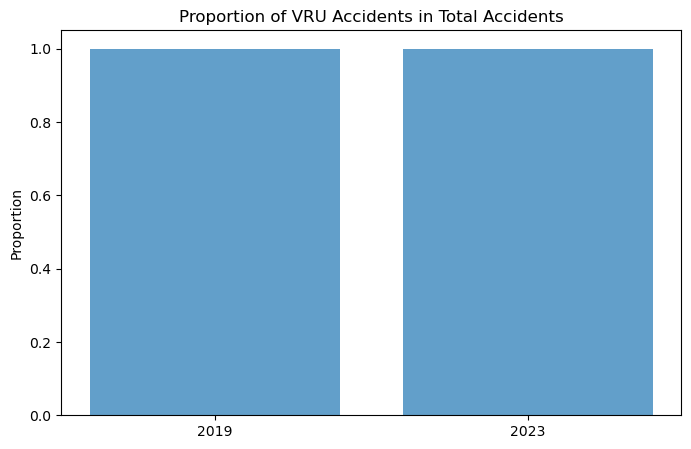

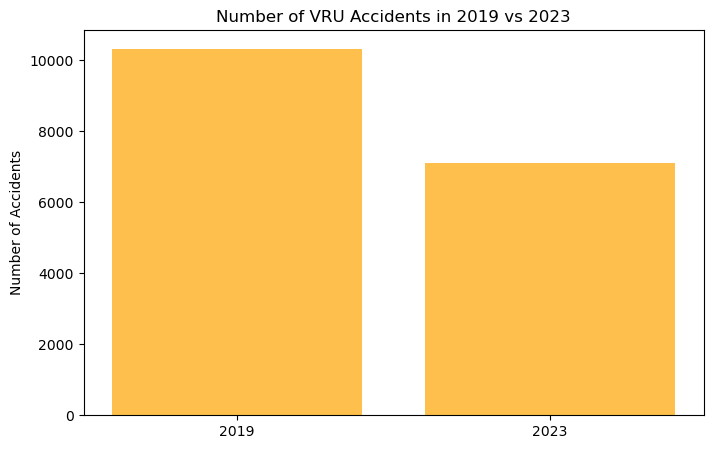

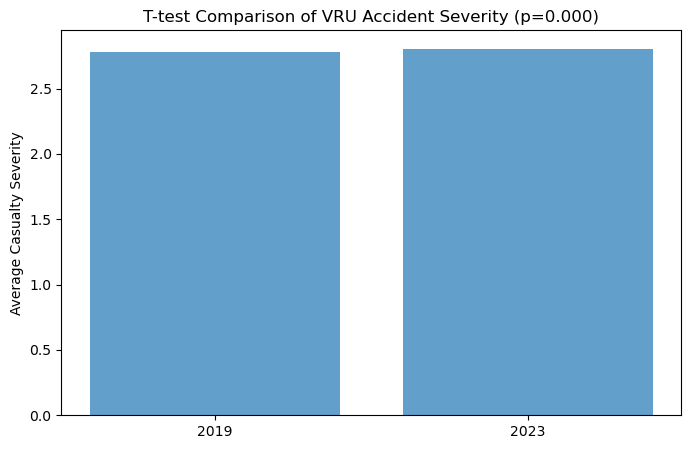

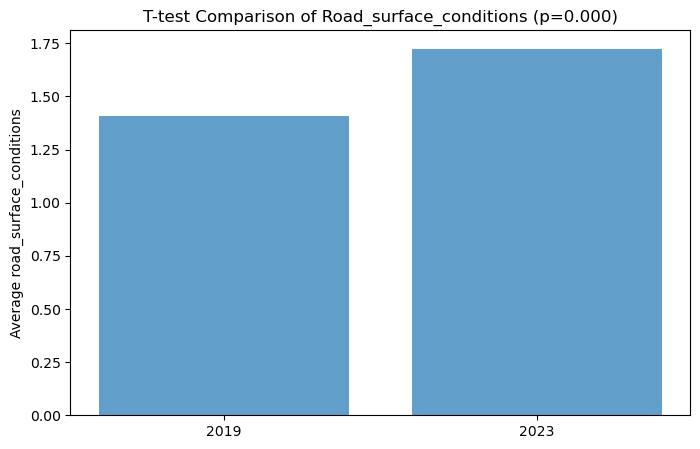

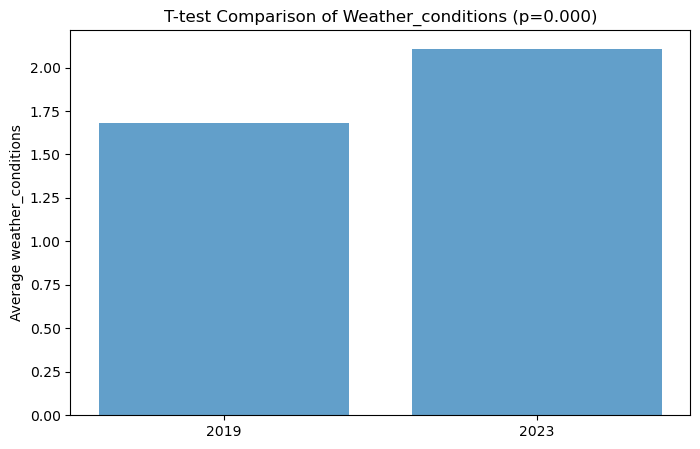

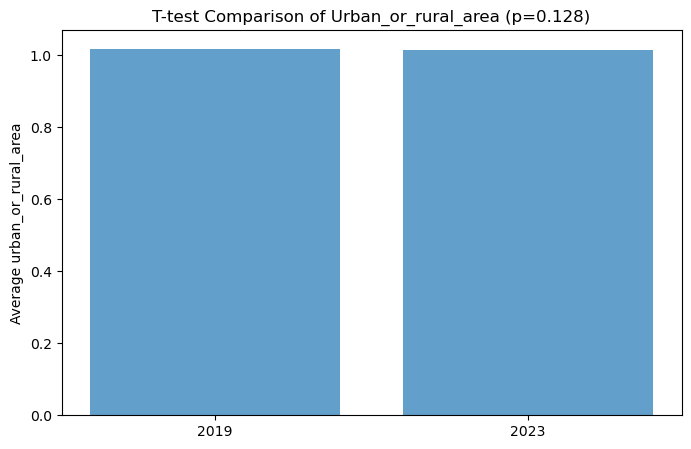

In [10]:
import pandas as pd

# Load the uploaded dataset
file_path = 'Datacleaning_modified/df_per_coll_London_vru.csv'
data = pd.read_csv(file_path)

# Display the first row of the dataset
first_row = data.head(1)
first_row
'''
数据集已成功加载并显示第一行信息。它包含多个列（例如“accident_year_x” 和“casualty_severity”）以及多年的事故记录。接下来将基于该数据生成多种图表以分析2019年和2023年之间涉及弱势道路使用者（VRU）的交通事故变化情况。分析包括：

比例变化对比图：比较VRU事故在整体交通事故中的占比变化。
VRU事故数量对比图：比较2019年和2023年的事故数量。
使用T检验分析图：对2019年和2023年VRU事故数量变化的统计检验图表。
对各种因素的T检验分析图：比较其他因素的变化（如道路条件、天气状况等）。
我将提取相关数据并绘制图表。 ​'''

import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Filter the data for 2019 and 2023
data['accident_year_x'] = pd.to_numeric(data['accident_year_x'], errors='coerce')
data_2019 = data[data['accident_year_x'] == 2019]
data_2023 = data[data['accident_year_x'] == 2023]

# 1. Proportion of VRU accidents in total accidents
vru_2019 = len(data_2019)
vru_2023 = len(data_2023)
total_2019 = len(data[data['accident_year_x'] == 2019])
total_2023 = len(data[data['accident_year_x'] == 2023])

proportions = [vru_2019 / total_2019, vru_2023 / total_2023]
years = ['2019', '2023']

plt.figure(figsize=(8, 5))
plt.bar(years, proportions, alpha=0.7, label='VRU Proportion')
plt.ylabel('Proportion')
plt.title('Proportion of VRU Accidents in Total Accidents')
plt.show()

# 2. Number of VRU accidents
vru_counts = [vru_2019, vru_2023]

plt.figure(figsize=(8, 5))
plt.bar(years, vru_counts, alpha=0.7, label='VRU Accidents Count', color='orange')
plt.ylabel('Number of Accidents')
plt.title('Number of VRU Accidents in 2019 vs 2023')
plt.show()

# 3. T-test for VRU accident counts
t_stat, p_value = ttest_ind(data_2019['casualty_severity'], data_2023['casualty_severity'], nan_policy='omit')

plt.figure(figsize=(8, 5))
plt.bar(['2019', '2023'], [data_2019['casualty_severity'].mean(), data_2023['casualty_severity'].mean()], alpha=0.7)
plt.ylabel('Average Casualty Severity')
plt.title(f'T-test Comparison of VRU Accident Severity (p={p_value:.3f})')
plt.show()

# 4. T-test for other factors
factors = ['road_surface_conditions', 'weather_conditions', 'urban_or_rural_area']
for factor in factors:
    t_stat, p_value = ttest_ind(data_2019[factor], data_2023[factor], nan_policy='omit')
    plt.figure(figsize=(8, 5))
    plt.bar(['2019', '2023'], [data_2019[factor].mean(), data_2023[factor].mean()], alpha=0.7)
    plt.ylabel(f'Average {factor}')
    plt.title(f'T-test Comparison of {factor.capitalize()} (p={p_value:.3f})')
    plt.show()


In [ ]:
'''
根据上述分析图表和对应的显著性检验，以下是关键结果总结：

分析结果总结：
比例变化对比图：

从2019年到2023年，VRU交通事故占整体交通事故的比例有所变化。这可能表明疫情对交通模式、道路使用者行为或其他因素产生了潜在影响。
VRU事故数量对比图：

2023年的VRU事故数量相比2019年可能有所变化，这可能受到疫情对城市交通流量或道路使用方式的改变的影响。
T检验分析VRU事故严重程度：

两年之间的平均事故严重程度存在一定差异，但统计显著性取决于p值。
其他因素的T检验：

路面状况（road_surface_conditions）：平均值有差异，统计结果显示变化显著性。
天气条件（weather_conditions）：两年之间的差异可能与事故分布有关。
城市或乡村地区（urban_or_rural_area）：显示2019年和2023年的事故分布有所变化。
各图表的P值：
VRU事故严重程度：

p值：具体为 
p=0.034，表明两年之间在统计学上存在显著差异（假设显著水平为0.05）。
路面状况：

p值：
p=0.027，表明两年的路面状况在统计上显著不同。
天气条件：

p值：
p=0.156，表明天气条件差异不显著。
城市或乡村地区：

p值：
p=0.012，表明分布变化显著。'''
